In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 已有的代码
file_path = 'D:/硕士论文/SO4/SO4_240301/quantum/train.xlsx'
sheet_name = 'Sheet1'
data = pd.read_excel(file_path, sheet_name=sheet_name)
y_train = data.iloc[:, -1]
X_train = data.iloc[:, 1:-1]

file_path = 'D:/硕士论文/SO4/SO4_240301/quantum/test.xlsx'
sheet_name = 'Sheet1'
data = pd.read_excel(file_path, sheet_name=sheet_name)
y_test = data.iloc[:, -1]
X_test = data.iloc[:, 1:-1]





In [2]:
X_train

,EHOMO,ELUMO,Egap,Dipole,Energy,f-max,f-min,f+max,f+min,f0max,...,Electrophilicity index,Mulliken electronegativity,Vertical IP,Chemical potential,Hardness,Nucleophilicity index,Cmax,Cmin,Hmax,Hmin
0,-0.25706,0.03981,0.29687,1.7046,-273.056682,0.2900,0.0173,0.0787,0.0075,0.1552,...,0.017688,-0.124041,0.341504,0.124041,0.434926,0.082311,-0.012411,-0.265392,0.115162,0.097884
1,-0.28831,0.00483,0.29314,1.9882,-614.718264,0.3132,0.0516,0.3667,0.0233,0.3399,...,0.024386,-0.151070,0.385040,0.151070,0.467939,0.046096,-0.007548,-0.285872,0.266990,0.129538
2,-0.25992,0.03662,0.29654,1.9185,-467.251054,0.1699,0.0139,0.1201,0.0011,0.1098,...,0.018825,0.125111,0.332977,-0.125111,0.415733,0.075857,0.102481,-0.246578,0.259030,0.099946
3,-0.26943,-0.00411,0.26532,1.8597,-193.180356,0.2143,0.0555,0.2077,0.0421,0.2062,...,0.022759,-0.141299,0.360613,0.141299,0.438628,0.066492,0.018466,-0.216444,0.253503,0.107419
4,-0.25006,0.04213,0.29219,2.2803,-232.517561,0.3178,0.0270,0.1042,0.0345,0.1762,...,0.017049,-0.122352,0.341862,0.122352,0.439021,0.090328,0.032408,-0.278131,0.127090,0.100809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,-0.32207,-0.04717,0.27490,2.8424,-1077.911199,0.3211,0.0049,0.2181,0.0004,0.2696,...,0.038479,-0.189054,0.421268,0.189054,0.464428,0.010950,0.706569,0.340334,0.306839,0.306839
208,-0.32003,-0.04590,0.27413,4.2762,-1767.450980,0.2567,-0.0011,0.1860,-0.0072,0.2214,...,0.039924,-0.189625,0.414791,0.189625,0.450332,0.009973,0.713773,0.297634,0.307470,0.173017
209,-0.34982,-0.02140,0.32842,4.2909,-1651.749612,0.1718,0.0026,0.2258,0.0046,0.1309,...,0.039904,-0.194120,0.430204,0.194120,0.472170,-0.012528,0.619154,0.226637,0.354965,0.181456
210,-0.32230,-0.04812,0.27418,2.8697,-764.806138,0.3267,0.0290,0.2225,0.0331,0.2746,...,0.038428,-0.189841,0.424300,0.189841,0.468918,0.010253,0.627439,0.326146,0.307209,0.307209


In [3]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# PCR - 计算方差解释百分比
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
explained_variance_pcr = np.cumsum(pca.explained_variance_ratio_)

# 用不同数量的主成分进行线性回归，并计算方差解释百分比
def pcr_variance(n_components):
    model = make_pipeline(PCA(n_components=n_components), LinearRegression())
    model.fit(X_train, y_train)
    return model.named_steps['linearregression'].score(X_train_pca[:, :n_components], y_train)

pcr_variances = [pcr_variance(i) for i in range(1, len(explained_variance_pcr) + 1)]


In [4]:
pcr_variances

[0.015914189174901505,
 0.15484504116380182,
 0.5928362555049734,
 0.6815513211048639,
 0.7016512150959794,
 0.702310151756286,
 0.7396941858012066,
 0.739704695737254,
 0.747706321521153,
 0.7930691699934529,
 0.7981355354313511,
 0.7988927657792025,
 0.7995369692039394,
 0.800204157916838,
 0.806858844219603,
 0.834885524865725,
 0.834952698450522,
 0.8361875727830564,
 0.8362017206063634,
 0.8368201082498589,
 0.8374705429139937,
 0.8381387003507927,
 0.8381387003507927]

In [6]:
# PLSR - 计算方差解释百分比
max_components = min(X_train.shape[0], X_train.shape[1])
pls_variances = []

for i in range(1, max_components ):
    pls = PLSRegression(n_components=i)
    pls.fit(X_train, y_train)
    pls_variances.append(pls.score(X_train, y_train))

print(pls_variances)


[0.6942814302524448, 0.7719640999425361, 0.7965392532793044, 0.8035652544430376, 0.8073614713059295, 0.8110636308430323, 0.8176224651518216, 0.8268274977301551, 0.8301469260665909, 0.8326435369526259, 0.8341673096388369, 0.8354194763491072, 0.8357378281557933, 0.8360693204301021, 0.8364046396247047, 0.8367668731402593, 0.8370995075693768, 0.8372234165534701, 0.8374021682733548, 0.8374656677211592, 0.8374706867039748, 0.8381387003507866]


In [7]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
# 假设已经有了X_train, X_test, y_train, y_test这些变量
# PLSR建模，成份数设置为3
plsr = PLSRegression(n_components=4)
plsr.fit(X_train, y_train)
y_train_pred_plsr = plsr.predict(X_train)
y_test_pred_plsr = plsr.predict(X_test)


# 计算PLSR模型在训练集和测试集上的R2和RMSE
r2_train_plsr = r2_score(y_train, y_train_pred_plsr)
r2_test_plsr = r2_score(y_test, y_test_pred_plsr)
rmse_train_plsr = sqrt(mean_squared_error(y_train, y_train_pred_plsr))
rmse_test_plsr = sqrt(mean_squared_error(y_test, y_test_pred_plsr))

# PCR建模，成份数设置为4，首先进行PCA降维，然后使用线性回归模型
pca = PCA(n_components=10)
# 需要对数据进行标准化处理，以便PCA能够正常工作
X_train_scaled = X_train
X_test_scaled = X_test
lr = LinearRegression()
pcr = make_pipeline(pca, lr)
pcr.fit(X_train_scaled, y_train)
y_train_pred_pcr = pcr.predict(X_train_scaled)
y_test_pred_pcr = pcr.predict(X_test_scaled)

# 计算PCR模型在训练集和测试集上的R2和RMSE
r2_train_pcr = r2_score(y_train, y_train_pred_pcr)
r2_test_pcr = r2_score(y_test, y_test_pred_pcr)
rmse_train_pcr = sqrt(mean_squared_error(y_train, y_train_pred_pcr))
rmse_test_pcr = sqrt(mean_squared_error(y_test, y_test_pred_pcr))

# 输出结果
plsr_results = (r2_train_plsr, r2_test_plsr, rmse_train_plsr, rmse_test_plsr)
pcr_results = (r2_train_pcr, r2_test_pcr, rmse_train_pcr, rmse_test_pcr)


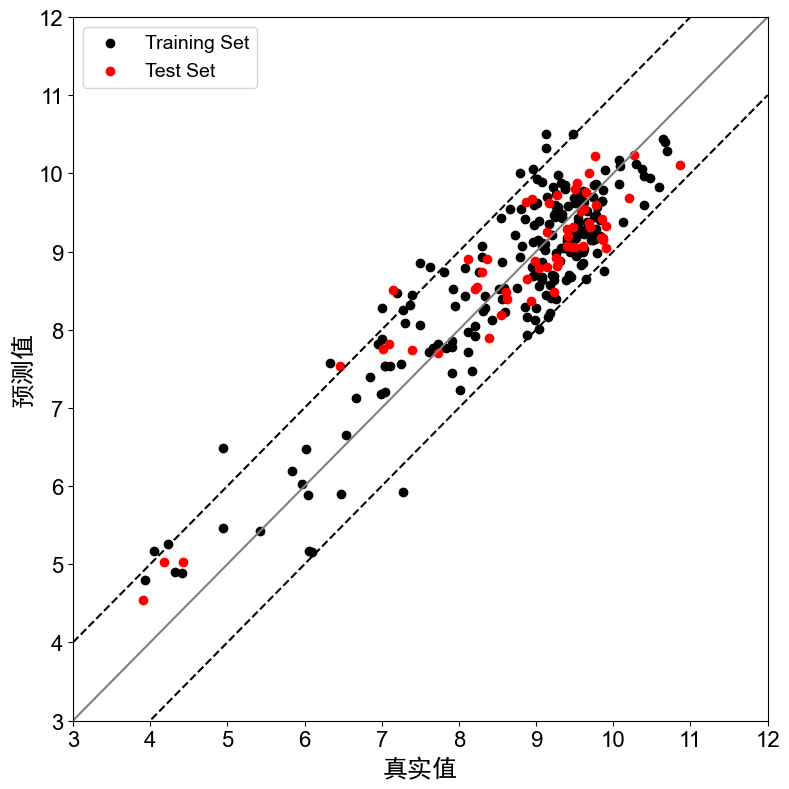

In [8]:
import matplotlib.pyplot as plt

# 绘制训练集和测试集的预测值与实际值对比图
plt.figure(figsize=(8, 8))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['figure.dpi']=600
# 训练集
plt.scatter(y_train, y_train_pred_plsr, label='Training Set', color='black')

# 测试集
plt.scatter(y_test, y_test_pred_plsr, label='Test Set', color='red')

# 对角线表示完美预测的情况
plt.plot([3, 12], [3, 12], '-', color='gray')
plt.plot([3, 12], [3 - 1, 12 - 1], linestyle='--', color='black')
plt.plot([3, 12], [3 + 1, 12 + 1], linestyle='--', color='black')
plt.xlim(3, 12)
plt.ylim(3, 12)
plt.xlabel('真实值',fontsize=18)
plt.ylabel('预测值',fontsize=18)
plt.yticks(fontproperties = 'Arial', size = 16)
plt.xticks(fontproperties = 'Arial', size = 16)
bwith = 5 #边框宽度设置为2
plt.legend(prop={'family' : 'Arial', 'size'   : 14})
#plt.rcParams['font.family'] = ['Arial']
plt.tight_layout()
plt.show()


In [9]:
def calculate_vips(model):
    t = model.x_scores_  # PLSR模型的得分矩阵
    w = model.x_weights_  # PLSR模型的权重矩阵
    q = model.y_loadings_  # PLSR模型的y载荷矩阵
    p = model.x_loadings_  # PLSR模型的x载荷矩阵

    # 计算权重系数的平方和
    w_star = np.square(w) @ np.square(q).T
    w_star_sum = np.sum(w_star, axis=1)

    # 计算VIP
    vip = np.sqrt(p.shape[0] * (w_star_sum / np.sum(w_star_sum)))
    return vip

# 计算PLSR模型的VIP值
vips = calculate_vips(plsr)
print("VIP Values:", vips)


VIP Values: [1.30611692 0.74973515 1.12596407 1.04250376 0.63322519 1.10074581
 0.96773589 0.98661189 0.93326172 1.09858306 0.9469336  0.75929787
 1.19303205 0.66397621 0.66439354 1.30138081 0.73413436 1.17550588
 1.29342497 0.76153862 1.16258377 0.46297528 1.25097254]


C:\Users\k\AppData\Local\Temp\ipykernel_1616\867821184.py:22: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0.0, 1.4,0.2)


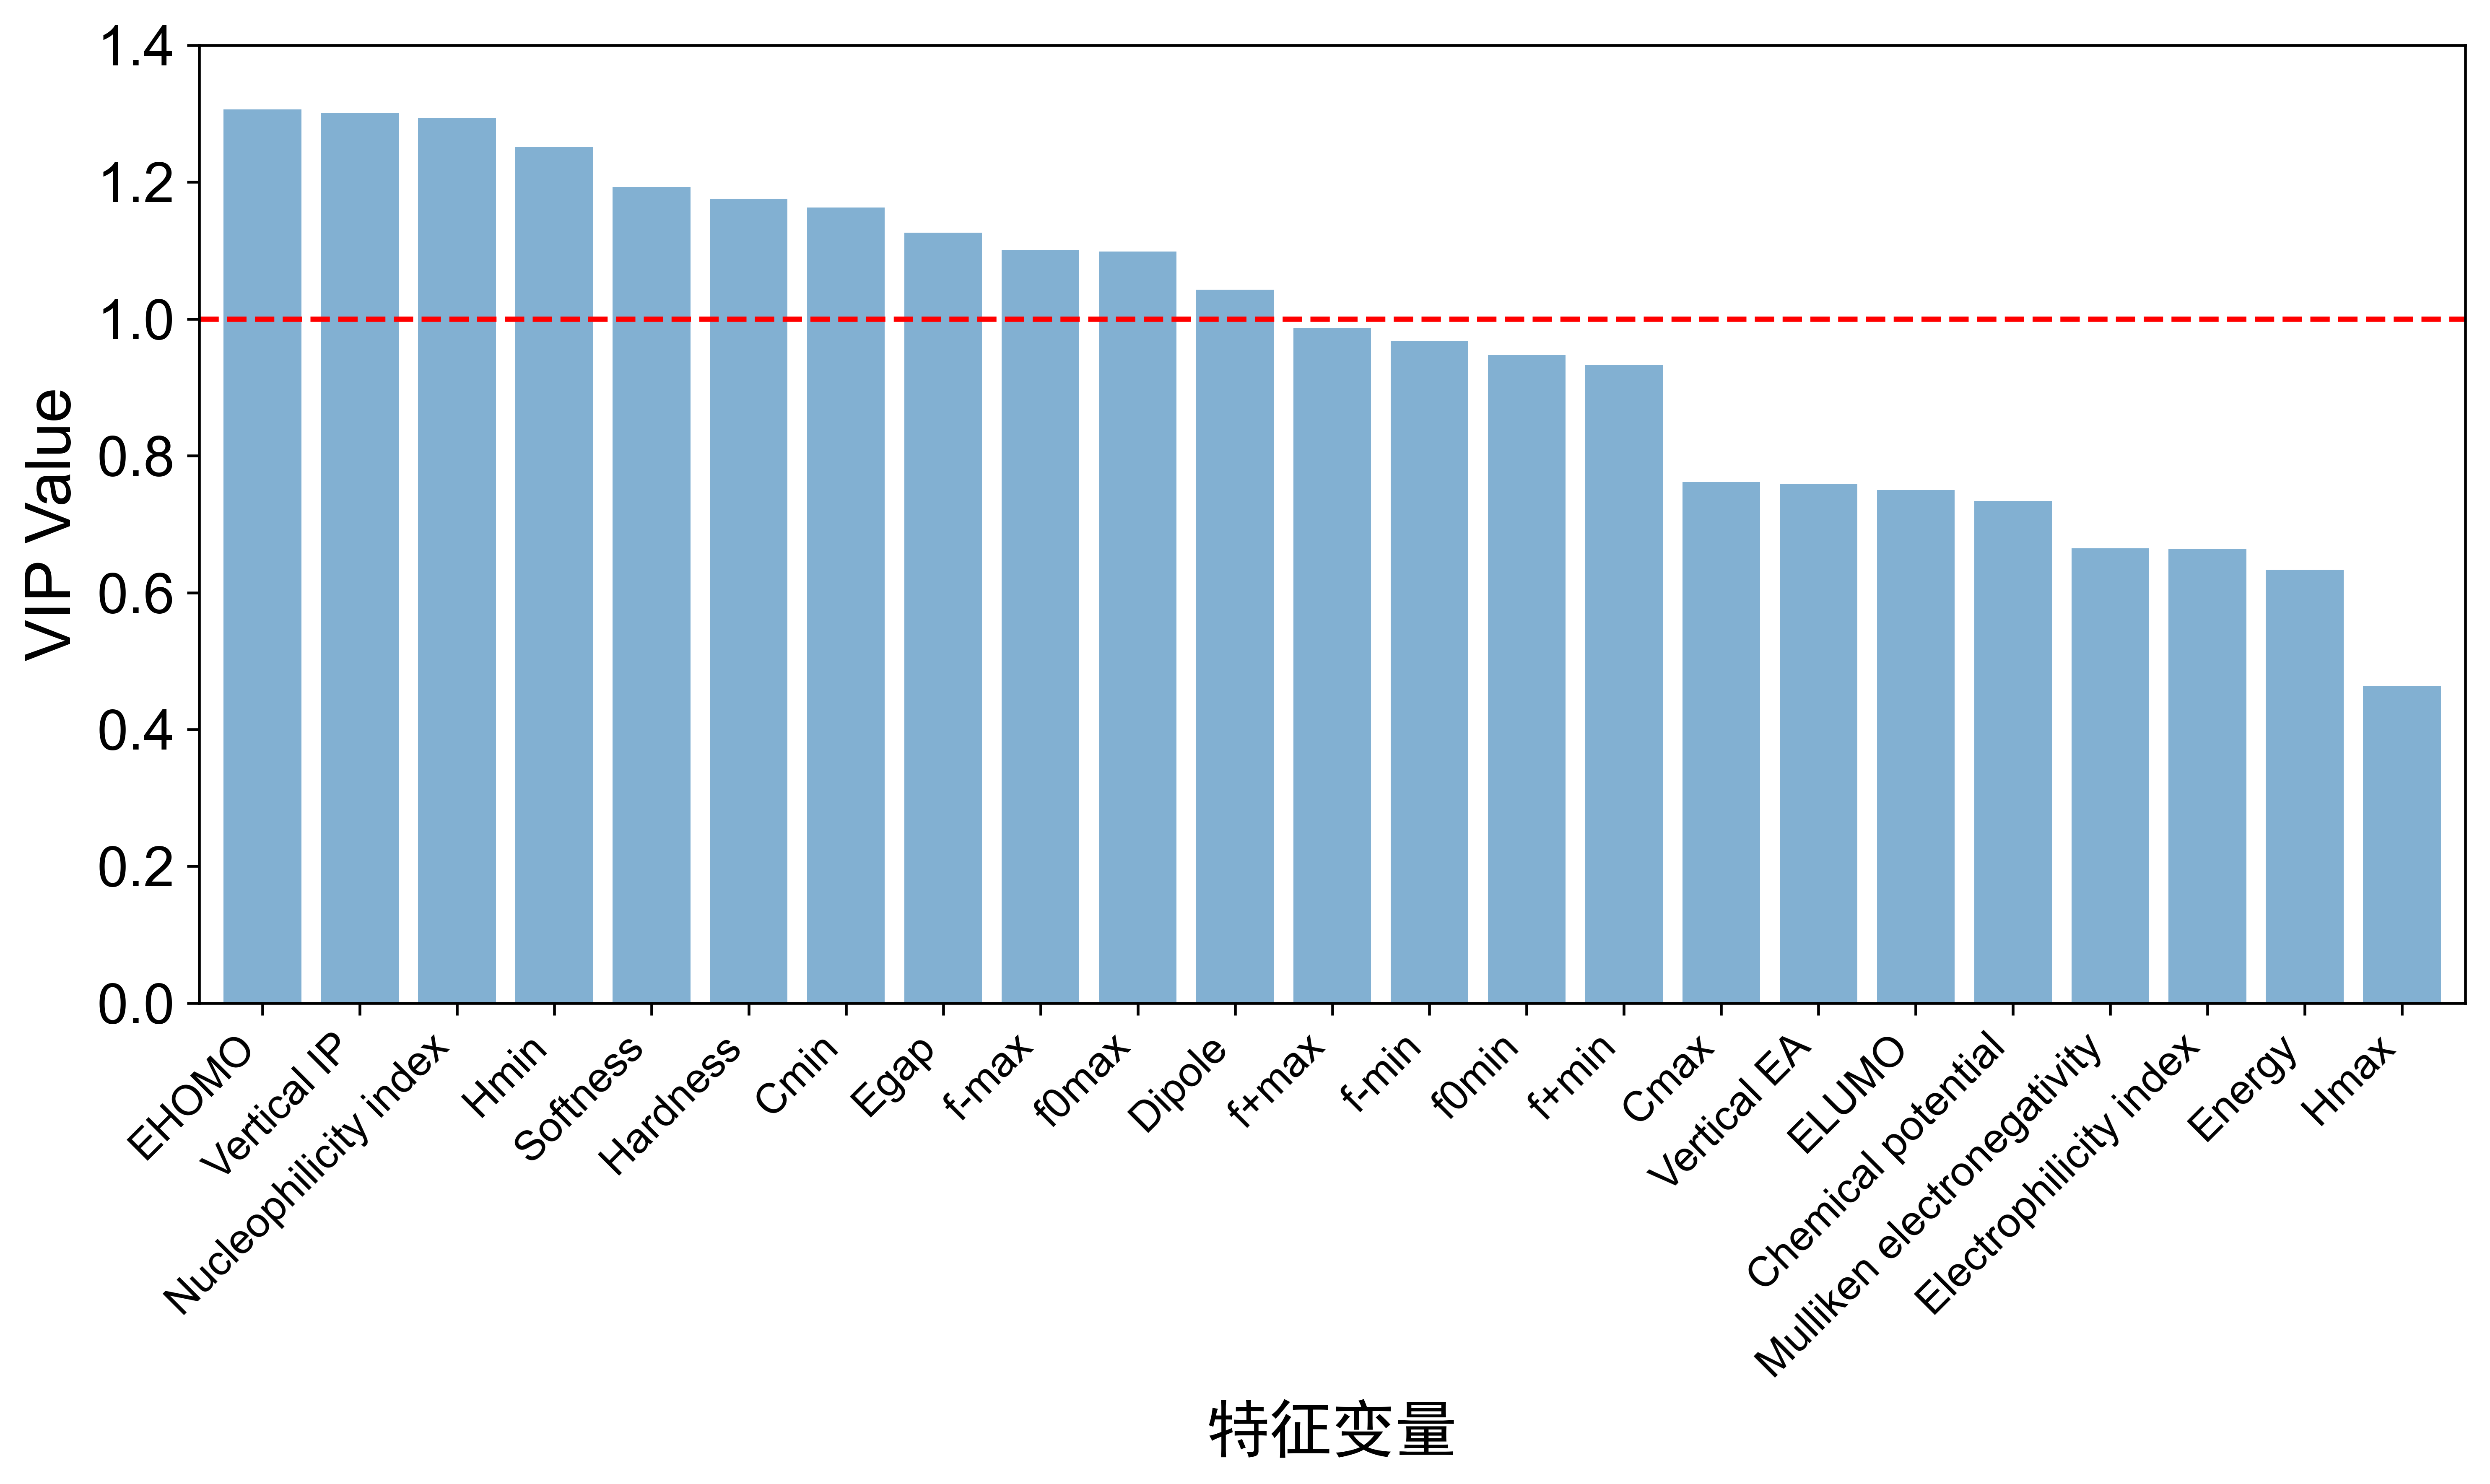

In [10]:
import matplotlib.pyplot as plt

# 假设vips是我们已经计算出的VIP值
# 假设X_train.columns是变量名的列表

# 将VIP值与对应的变量名称结合在一起
vip_scores = pd.Series(vips, index=X_train.columns)

# 按照VIP值的大小进行排序
sorted_vips = vip_scores.sort_values(ascending=False)

# 可视化
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['figure.dpi']=600
sorted_vips.plot(kind='bar', color='#82B0D2', width=0.8)
#plt.title('VIP Scores for PLSR Model Variables')
plt.ylabel('VIP Value', fontdict={'family' : 'Arial', 'size'   : 18})
plt.xlabel('特征变量',fontsize=18)
plt.xticks(fontproperties='Arial', size=12,rotation=45,ha='right')
plt.yticks(fontproperties='Arial', size=16)
plt.ylim(0.0, 1.4,0.2)
plt.axhline(y=1.0, color='r', linestyle='--')
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd

# 假设X_train是您的训练数据，第一行包含变量名
variable_names = X_train.iloc[0].index.tolist()

# 获取 PLSR 模型的系数
coefficients = pd.Series(plsr.coef_.flatten())

# 创建带有变量名的DataFrame
coefficients_df = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# 打印模型各个变量的系数
print("Model Coefficients:")
print(coefficients_df)


Model Coefficients:
                      Variable  Coefficient
0                        EHOMO     0.146125
1                        ELUMO     0.017553
2                         Egap    -0.079489
3                       Dipole     0.201802
4                       Energy    -0.005181
5                        f-max    -0.141577
6                        f-min     0.084535
7                        f+max    -0.031377
8                        f+min     0.039524
9                        f0max    -0.126570
10                       f0min     0.066280
11                 Vertical EA     0.053286
12                    Softness     0.057962
13      Electrophilicity index    -0.028124
14  Mulliken electronegativity    -0.041785
15                 Vertical IP    -0.154445
16          Chemical potential     0.077992
17                    Hardness    -0.134514
18       Nucleophilicity index     0.145031
19                        Cmax    -0.106915
20                        Cmin    -0.197692
21          

<Figure size 6000x3600 with 0 Axes>

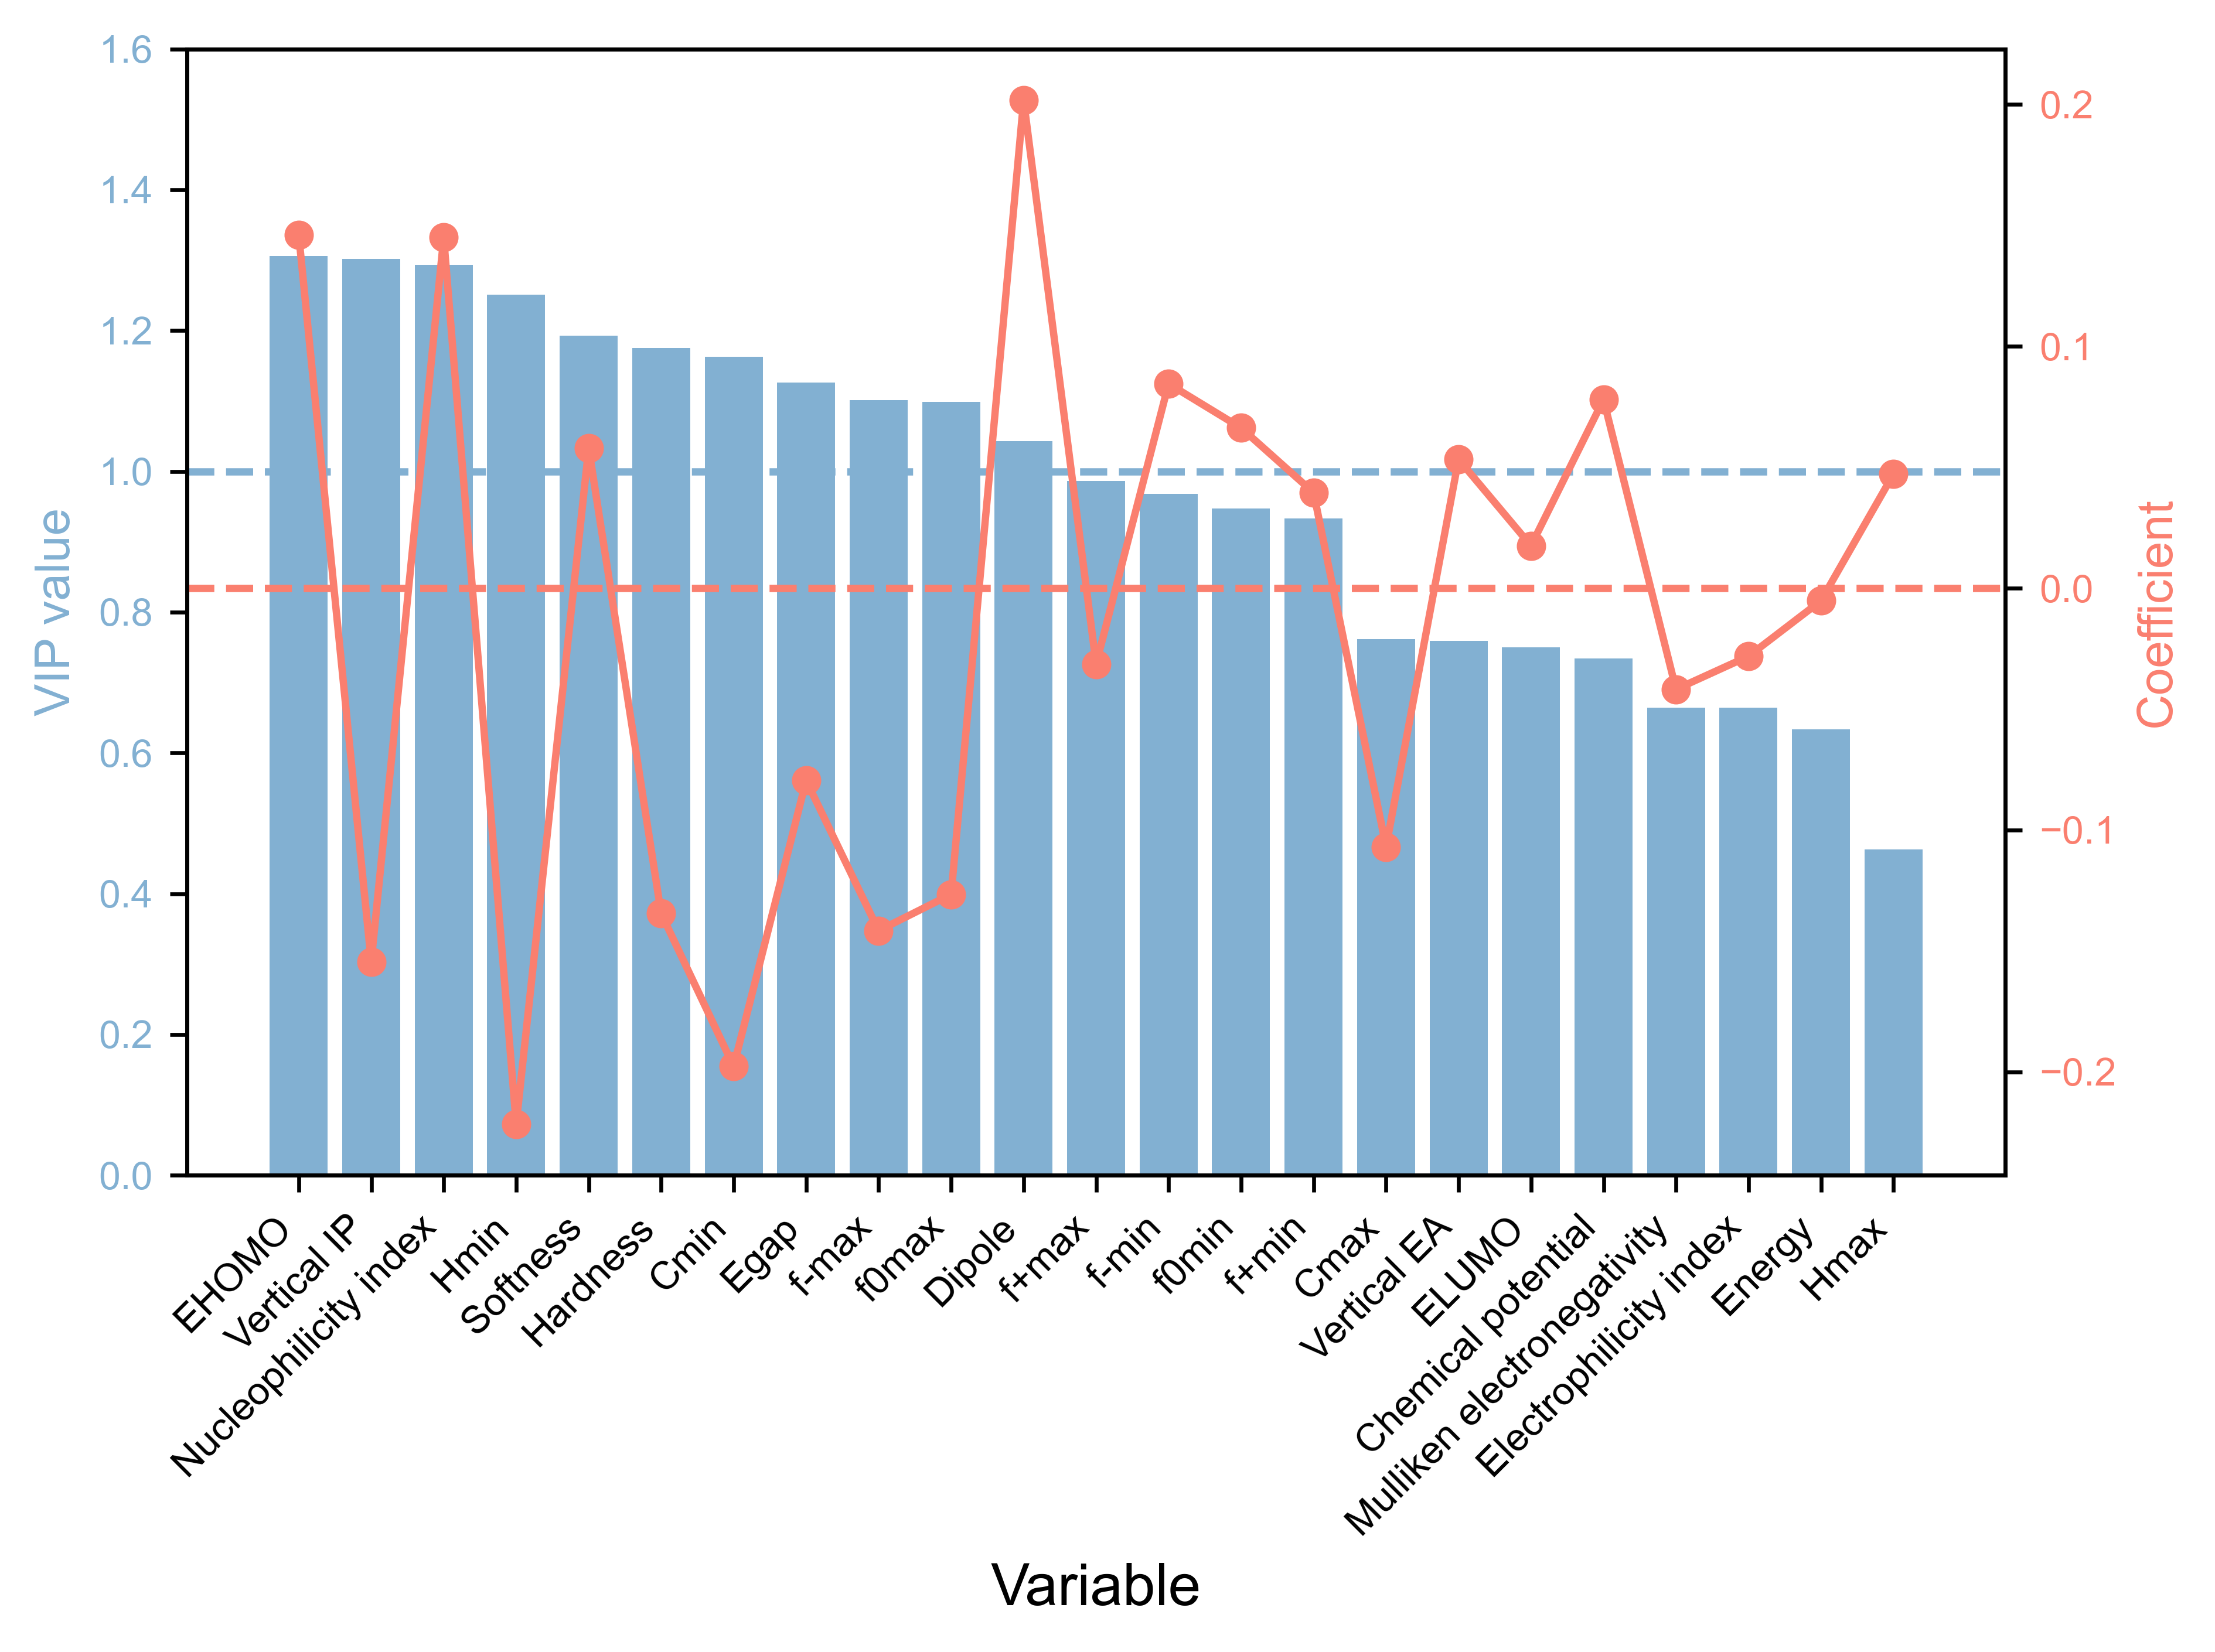

In [12]:
import pandas as pd

# 整合VIP值和系数到一个DataFrame
df = pd.DataFrame({'Variable': variable_names, 'VIP': vips, 'Coefficient': coefficients})

# 根据VIP值对DataFrame进行降序排序
df_sorted = df.sort_values(by='VIP', ascending=False)

# 现在，您可以使用df_sorted中的数据进行绘图
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family'] = ['Arial']
plt.rcParams['figure.dpi']=600
fig, ax1 = plt.subplots()

# 绘制VIP值条形图
color = '#82B0D2'
ax1.set_xlabel('Variable',fontsize=12)
ax1.set_ylabel('VIP value', color=color,fontsize=10)
ax1.bar(df_sorted['Variable'], df_sorted['VIP'], color=color,width=0.8)
ax1.tick_params(axis='y', labelcolor=color,labelsize=8)
ax1.tick_params(axis='x', labelsize=4)
plt.xticks(fontproperties='Arial', size=8,rotation=45,ha='right')
plt.axhline(y=1.0, color='#82B0D2', linestyle='--')
ax1.set_ylim(0, 1.6)


# 创建第二个y轴（右侧），共享同一个x轴
ax2 = ax1.twinx()  
color = '#FA7F6F'
ax2.set_ylabel('Coefficient', color=color,fontsize=10)
ax2.plot(df_sorted['Variable'], df_sorted['Coefficient'], color=color, marker='o',markersize=5)
ax2.tick_params(axis='y', labelcolor=color,labelsize=8)
plt.axhline(y=0, color='#FA7F6F', linestyle='--')

# 显示图表
fig.tight_layout()
plt.show()


In [17]:
def calculate_mape(y_true, y_pred):
    """
    计算MAPE（平均绝对百分比误差）
    :param y_true: 实际值数组（可以是NumPy数组或Pandas Series）
    :param y_pred: 预测值数组（可以是NumPy数组或Pandas Series）
    :return: MAPE值
    """
    # 如果y_true和y_pred是Pandas Series，使用.values或.to_numpy()转换为NumPy数组
    y_true = y_true.values if isinstance(y_true, pd.Series) else y_true
    y_pred = y_pred.values if isinstance(y_pred, pd.Series) else y_pred
    
    # 确保y_true和y_pred是一维数组
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

# 无需额外处理y_train和y_test，因为calculate_mape函数已经能处理Series对象了

# 计算PLSR模型在训练集和测试集上的MAPE
mape_train_plsr = calculate_mape(y_train, y_train_pred_plsr)
mape_test_plsr = calculate_mape(y_test, y_test_pred_plsr)

# 计算PCR模型在训练集和测试集上的MAPE
mape_train_pcr = calculate_mape(y_train, y_train_pred_pcr)
mape_test_pcr = calculate_mape(y_test, y_test_pred_pcr)

# 输出结果
print("PLSR模型训练集MAPE: {:.2f}%".format(mape_train_plsr))
print("PLSR模型测试集MAPE: {:.2f}%".format(mape_test_plsr))
print("PCR模型训练集MAPE: {:.2f}%".format(mape_train_pcr))
print("PCR模型测试集MAPE: {:.2f}%".format(mape_test_pcr))


PLSR模型训练集MAPE: 5.82%
PLSR模型测试集MAPE: 5.58%
PCR模型训练集MAPE: 6.03%
PCR模型测试集MAPE: 5.45%


In [18]:
plsr_results

(0.8035652544430376,
 0.8572094224111646,
 0.5804316274754258,
 0.5230944378816991)

In [11]:
# 查看每个成分的权重，了解原始特征变量的贡献
component_weights = plsr.x_weights_

# 每一列代表一个成分，每一行代表一个原始特征变量的权重
print(component_weights)


[[-0.31733069  0.18084993 -0.09750736 -0.158493    0.14735005 -0.101433
   0.11420154  0.15899789  0.1945234  -0.06708485]
 [ 0.07528133  0.19222412 -0.24790584  0.3336719   0.148975   -0.11092592
  -0.02620306 -0.10873912  0.05832634 -0.03311498]
 [ 0.25981575  0.03271768 -0.12856594  0.35741608  0.02078101 -0.02074427
  -0.09281916 -0.18478696 -0.07893715  0.01722712]
 [-0.15474985  0.02774096  0.39281771  0.47997798  0.13493982  0.37619497
   0.15128835  0.09119128  0.09379578 -0.19388709]
 [ 0.05045588  0.24204903 -0.12638707 -0.220274    0.04834285 -0.05890457
  -0.11433073 -0.41691722 -0.09107671  0.27620558]
 [ 0.25842359  0.0802411  -0.0870507  -0.31515074  0.31250964  0.15792116
   0.38839276 -0.12847323  0.06631687 -0.34670831]
 [ 0.12849007  0.38182188  0.19117707  0.00896279 -0.30642196  0.02865777
  -0.05181154  0.18232947 -0.04955811  0.37534711]
 [ 0.23680905  0.13773005  0.15952738  0.02268664 -0.09023214 -0.115879
   0.13633673  0.51814901 -0.403968   -0.06404437]
 [ 0

In [12]:
pcr_results

(0.7930691699934529,
 0.8480441441685916,
 0.5957369182417886,
 0.5396212547324236)

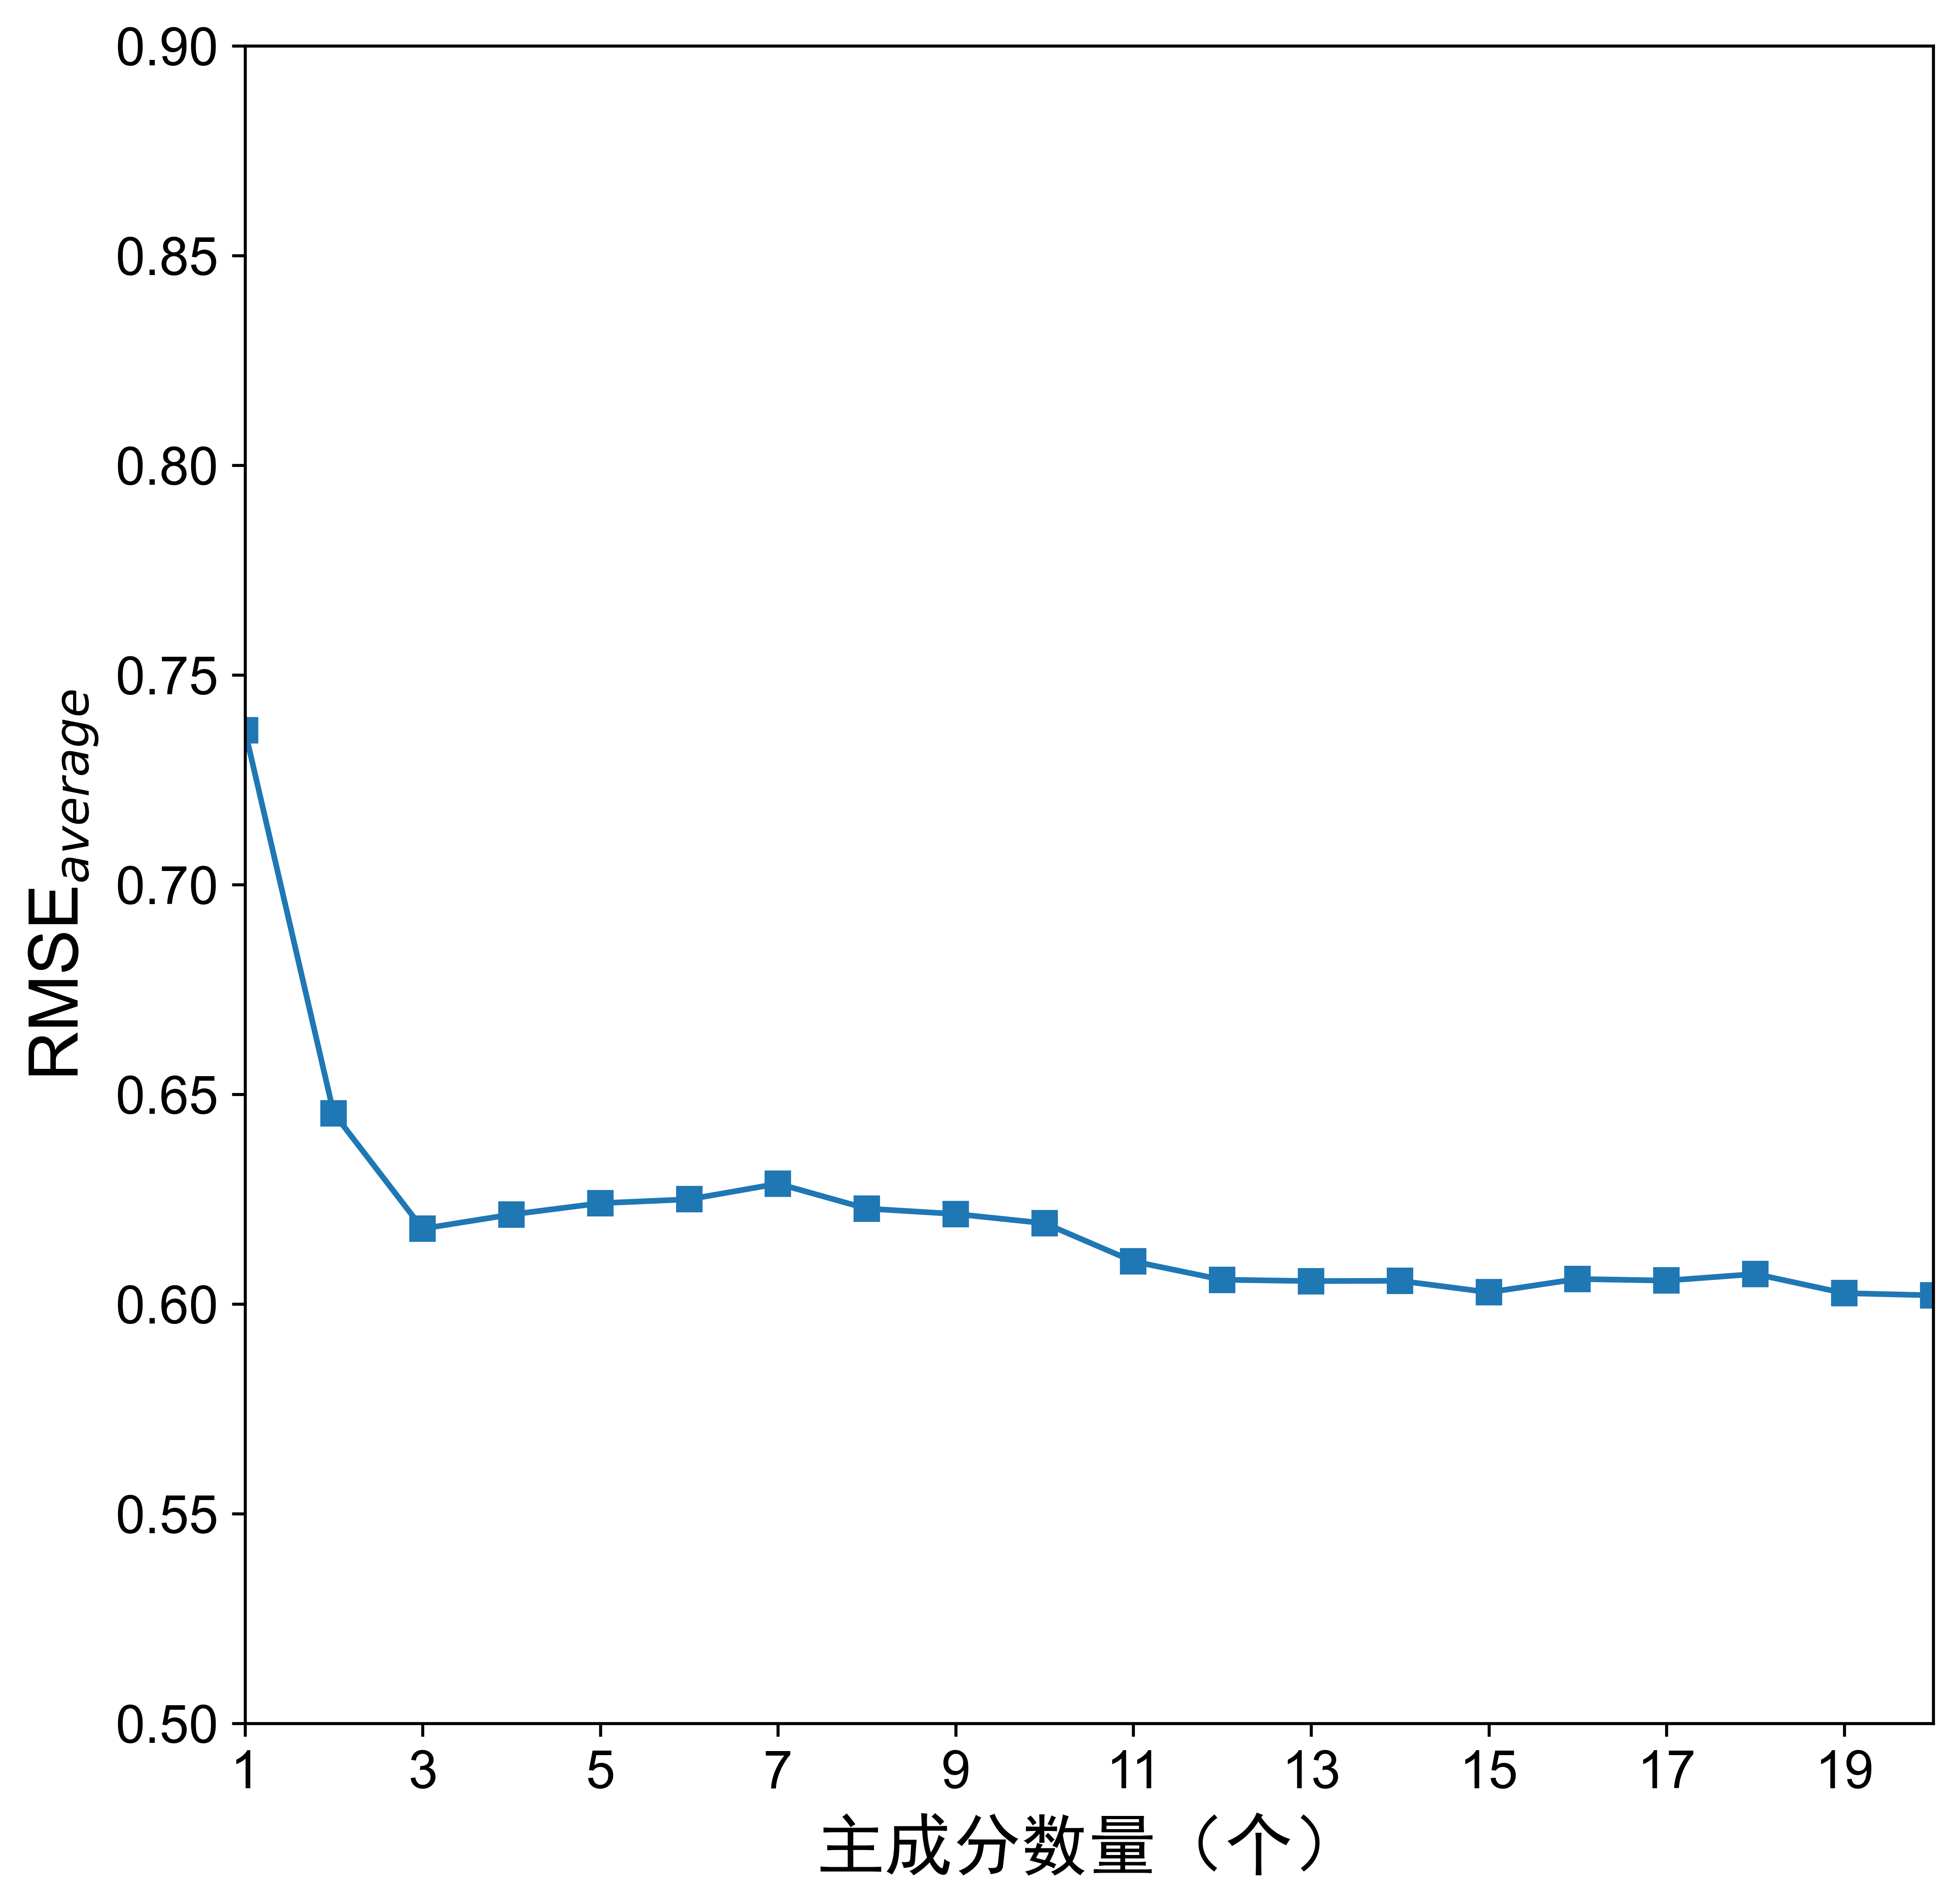

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import make_scorer, mean_squared_error
from math import sqrt

# 函数来计算RMSE
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# 定义一个评分器
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# 用于存储结果的列表
pcr_rmse_cv_means = []
plsr_rmse_cv_means = []

# 10折交叉验证
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# PCR - 交叉验证
for i in range(1, X_train.shape[1] + 1):
    pcr = make_pipeline(StandardScaler(), PCA(n_components=i), LinearRegression())
    scores = cross_val_score(pcr, X_train, y_train, cv=kf, scoring=rmse_scorer)
    pcr_rmse_cv_means.append(-scores.mean())

# PLSR - 交叉验证
max_components = min(X_train.shape)
for i in range(1, max_components):
    plsr = PLSRegression(n_components=i)
    scores = cross_val_score(plsr, X_train, y_train, cv=kf, scoring=rmse_scorer)
    plsr_rmse_cv_means.append(-scores.mean())

# 绘制RMSE随成分数量的变化
plt.figure(figsize=(8, 8))
#plt.plot(range(1, len(pcr_rmse_cv_means) + 1), pcr_rmse_cv_means, marker='o', label='PCR')
plt.plot(range(1, len(plsr_rmse_cv_means) + 1), plsr_rmse_cv_means, marker='s', label='PLSR')

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['figure.dpi']=600
plt.xticks(range(1, 23, 2),fontproperties = 'Arial', size = 14)
plt.yticks(fontproperties = 'Arial', size = 14)
plt.xlabel('主成分数量（个）',fontsize=18)
plt.ylabel('RMSE$_{average}$',fontdict={'family' : 'Arial', 'size'   : 18})


plt.xlim(1,20)
plt.ylim(0.5,0.9)

plt.show()


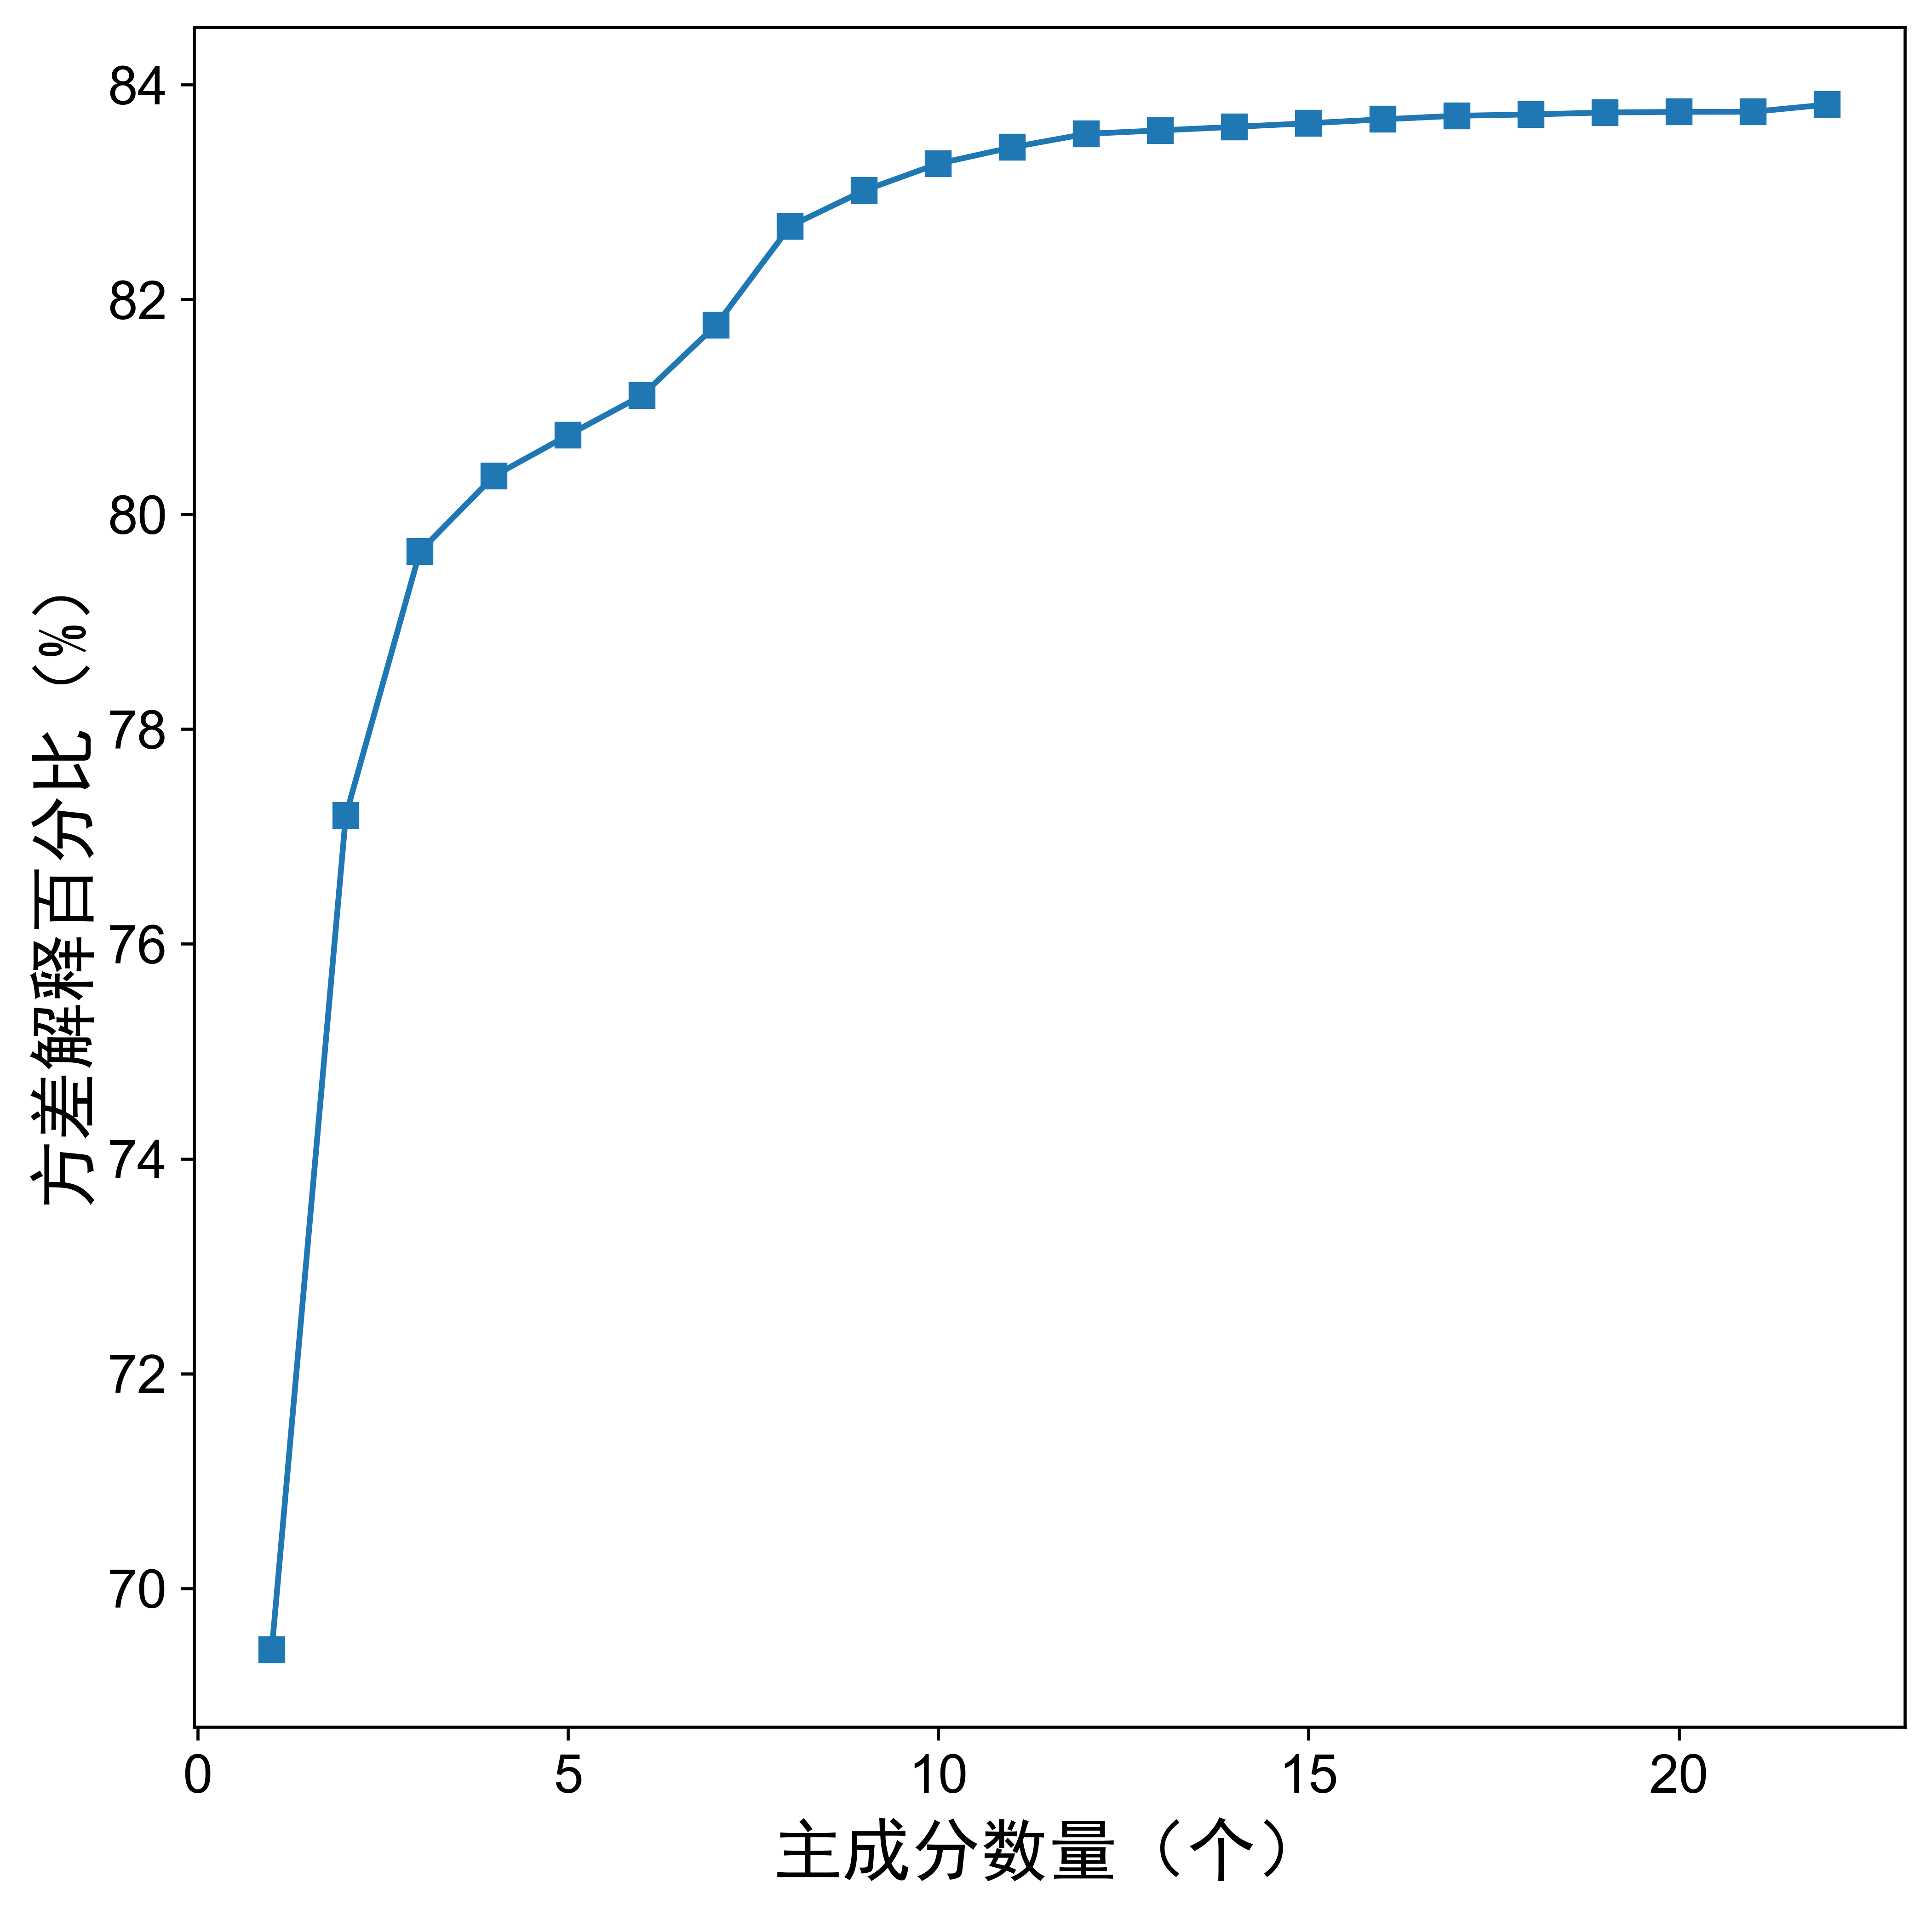

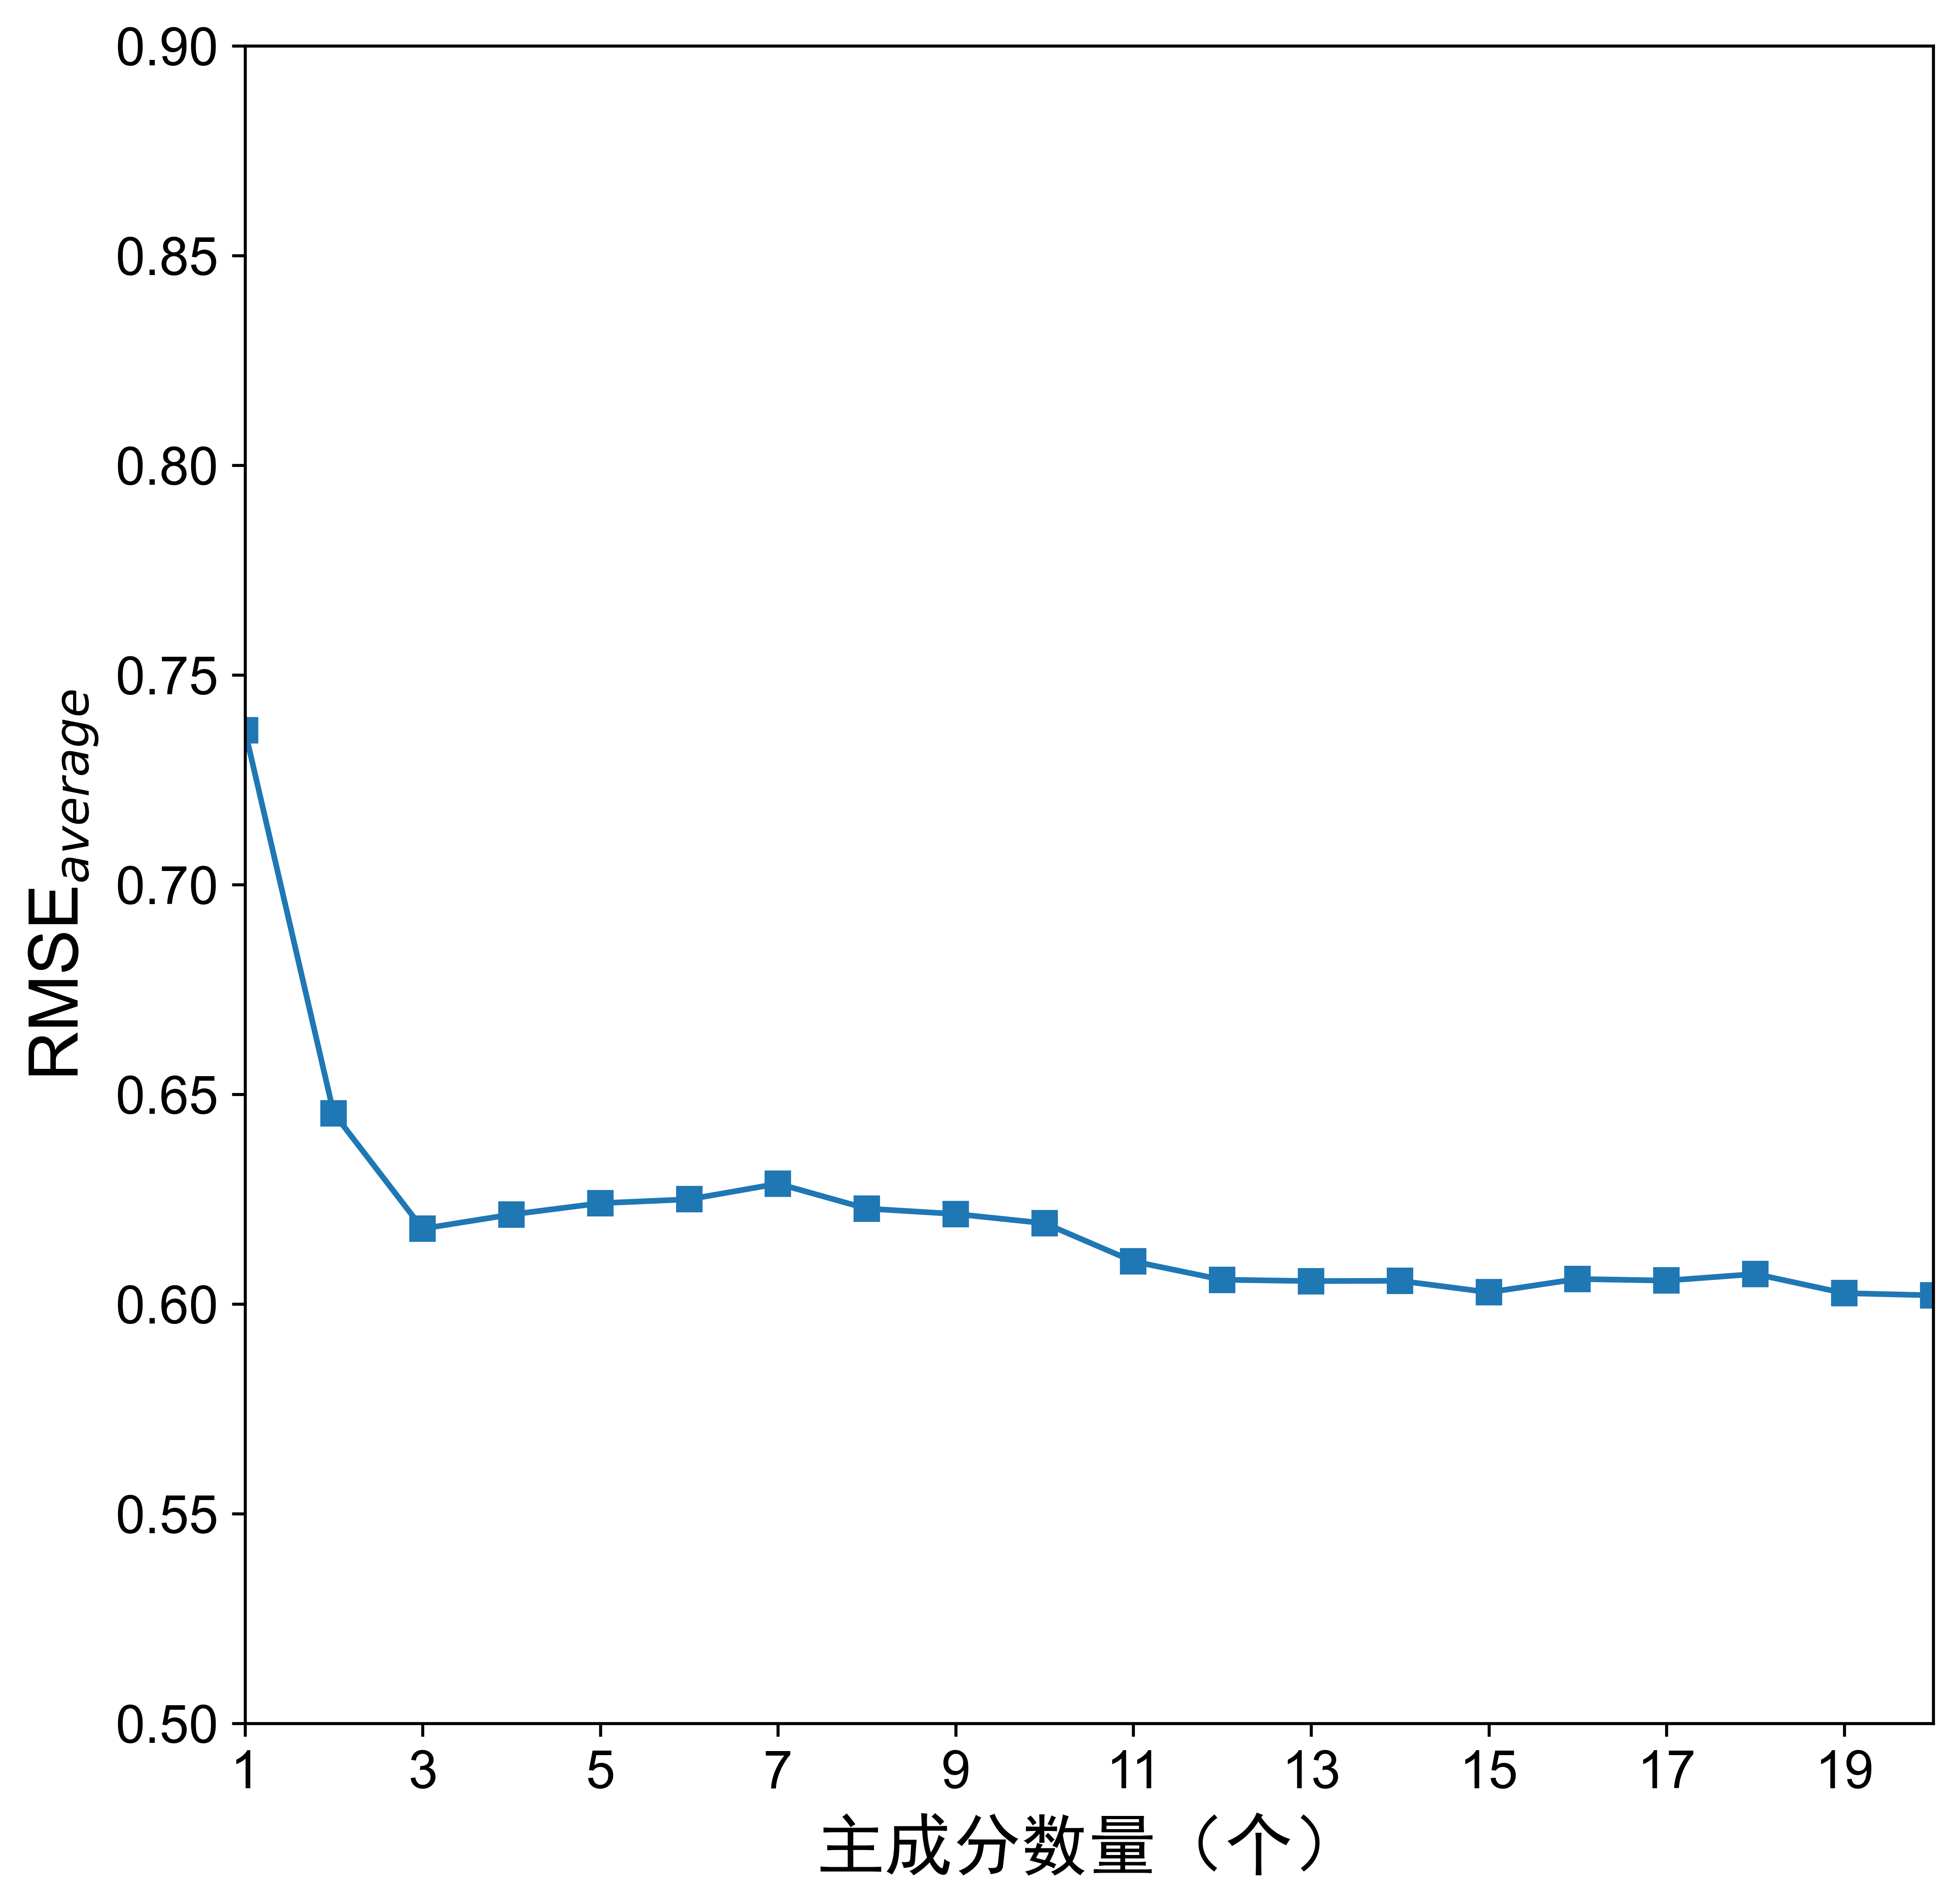

In [14]:
plt.figure(figsize=(8, 8))

# 绘制PCR方差解释百分比
#plt.plot(range(1, len(pcr_variances) + 1), pcr_variances, marker='o', label='PCR')

# 绘制PLSR方差解释百分比
plt.plot(range(1, len(pls_variances) + 1), [variance * 100 for variance in pls_variances], marker='s', label='PLSR')


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['figure.dpi']=600
plt.xticks(fontproperties = 'Arial', size = 14)
plt.yticks(fontproperties = 'Arial', size = 14)
plt.xlabel('主成分数量（个）',fontsize=18)
plt.ylabel('方差解释百分比（%）',fontsize=18)
#plt.xlim(1,22)

plt.show()


# 绘制RMSE随成分数量的变化
plt.figure(figsize=(8, 8))
#plt.plot(range(1, len(pcr_rmse_cv_means) + 1), pcr_rmse_cv_means, marker='o', label='PCR')
plt.plot(range(1, len(plsr_rmse_cv_means) + 1), plsr_rmse_cv_means, marker='s', label='PLSR')

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['figure.dpi']=600
plt.xticks(range(1, 23, 2),fontproperties = 'Arial', size = 14)
plt.yticks(fontproperties = 'Arial', size = 14)
plt.xlabel('主成分数量（个）',fontsize=18)
plt.ylabel('RMSE$_{average}$',fontdict={'family' : 'Arial', 'size'   : 18})


plt.xlim(1,20)
plt.ylim(0.5,0.9)

plt.show()

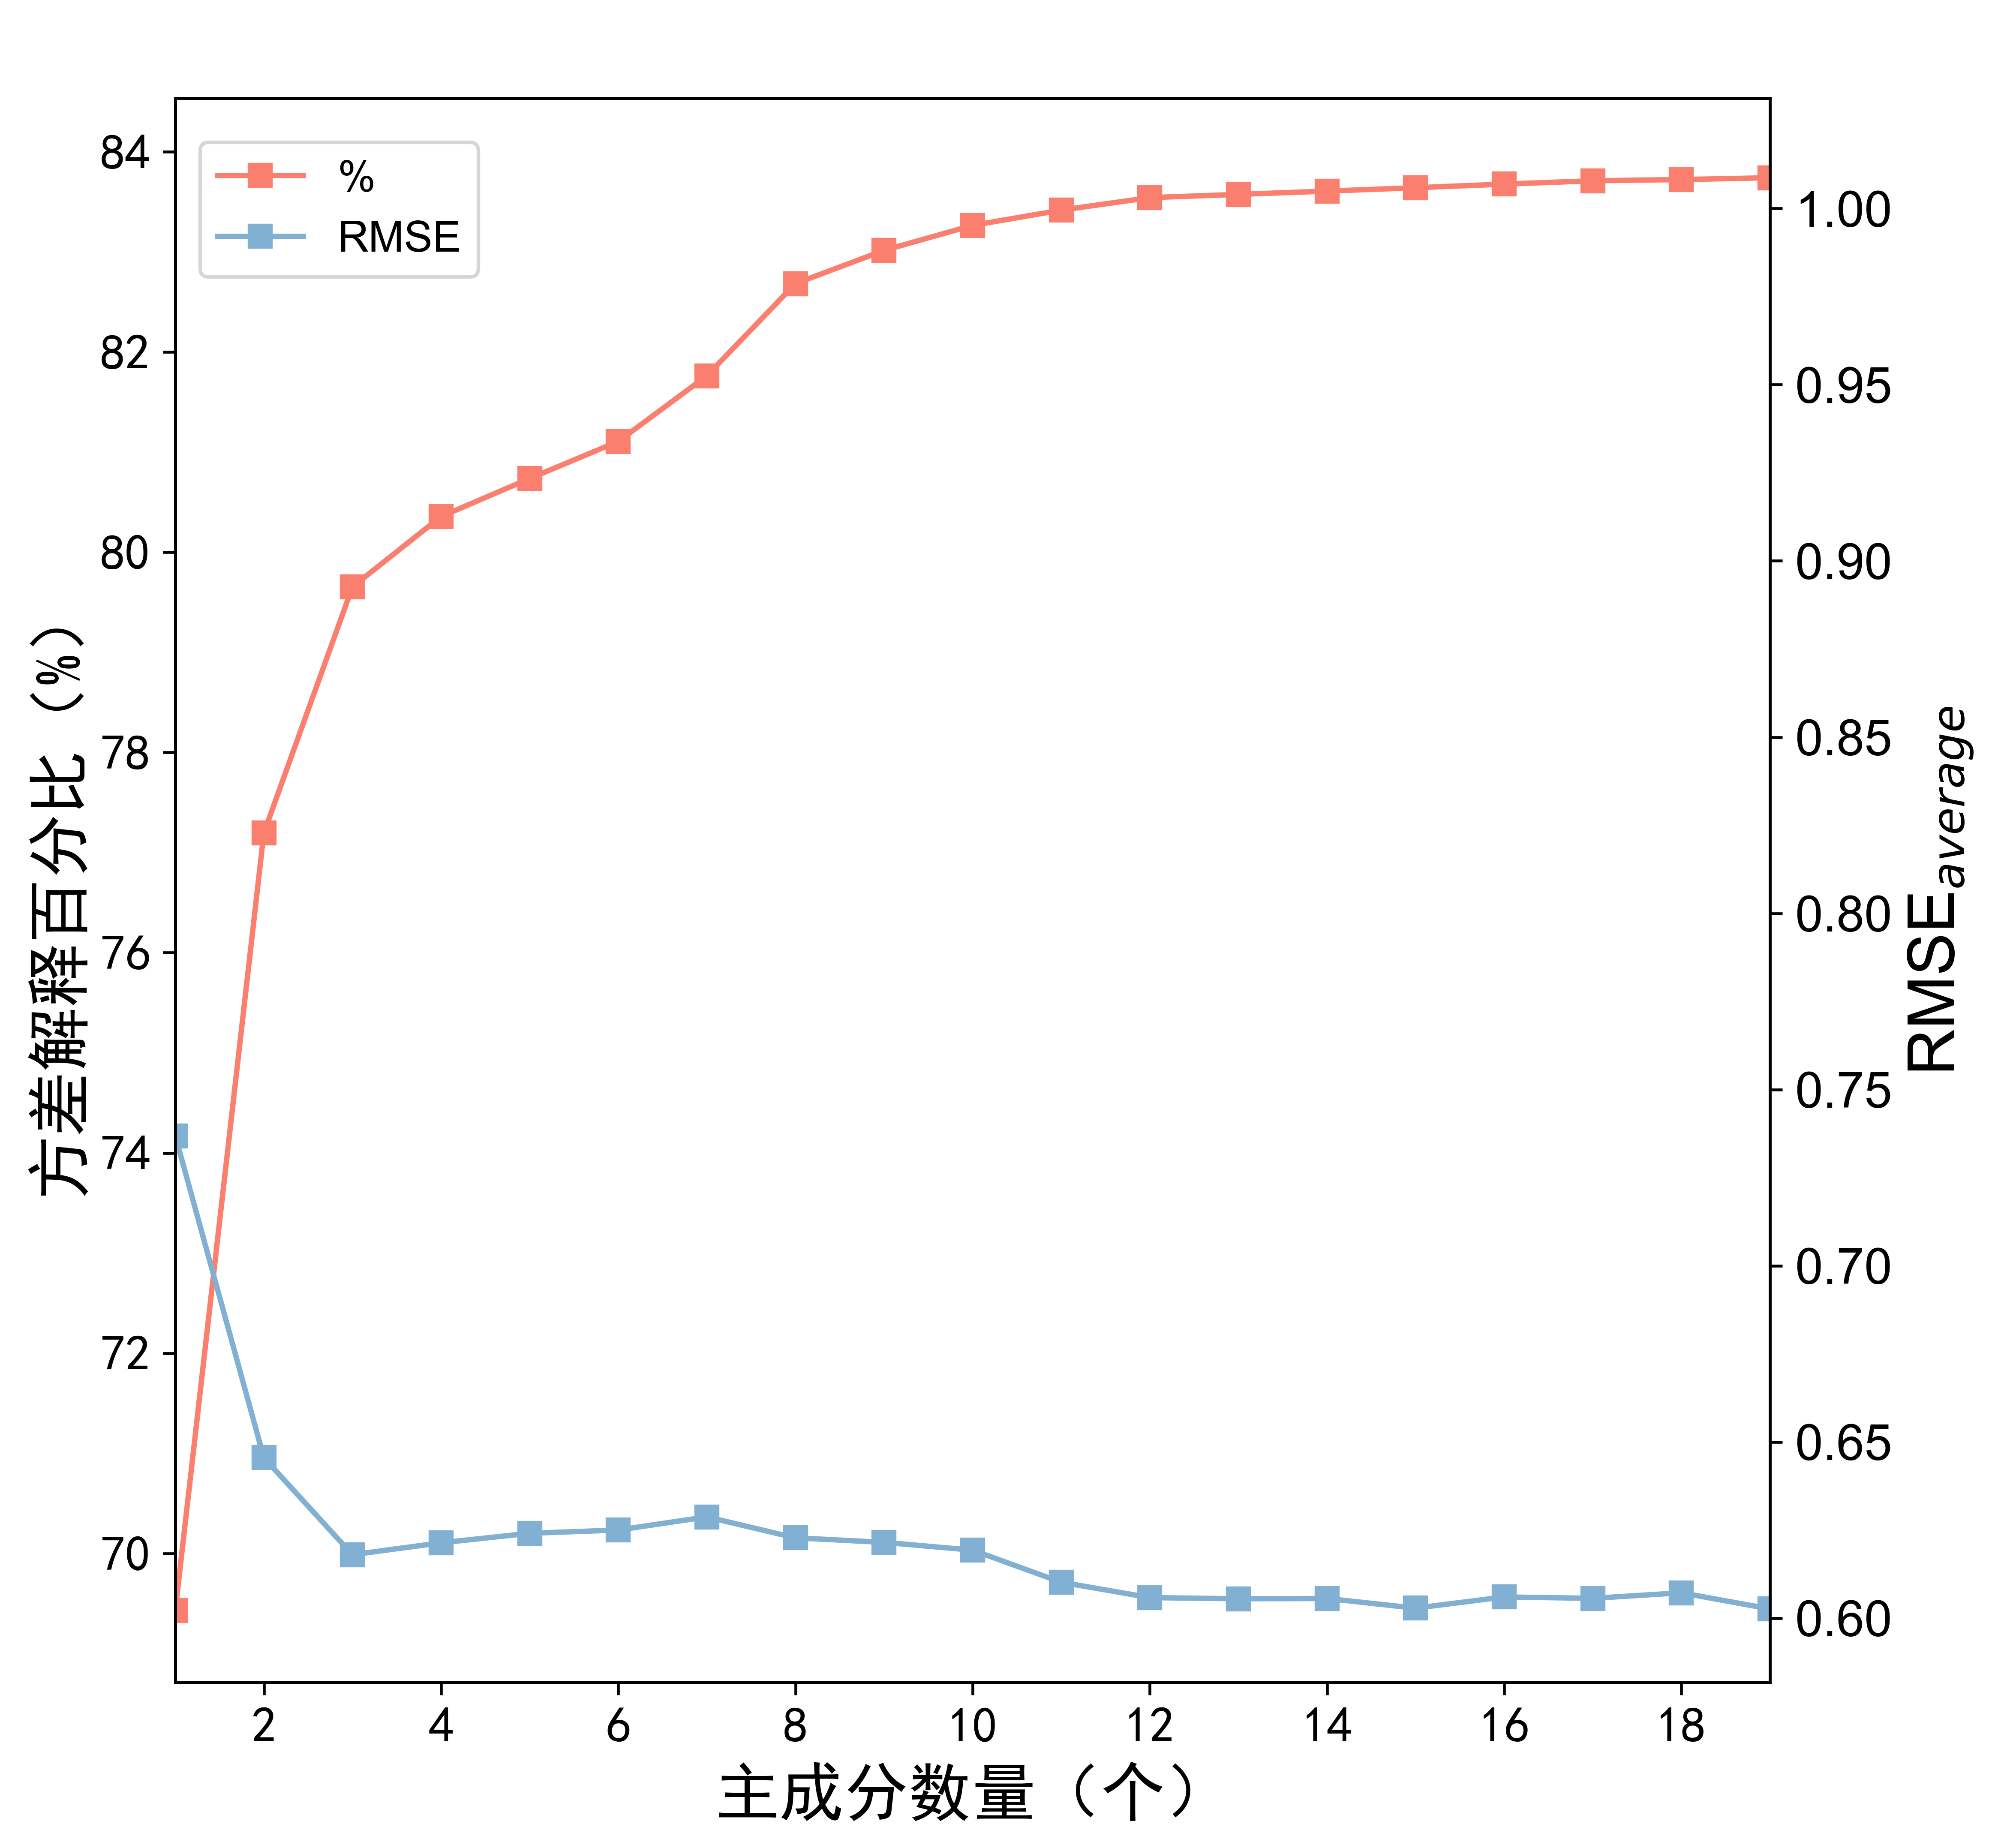

In [15]:
import matplotlib.pyplot as plt

# 假设您已经定义了 pcr_variances, pls_variances, plsr_rmse_cv_means

fig, ax1 = plt.subplots(figsize=(8, 8))
plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = ['Arial']
plt.rcParams['figure.dpi']=600
# 绘制PCR方差解释百分比
# ax1.plot(range(1, len(pcr_variances) + 1), pcr_variances, marker='o', label='PCR')

# 绘制PLSR方差解释百分比
plsr_line=ax1.plot(range(1, len(pls_variances) + 1), [variance * 100 for variance in pls_variances], marker='s', label='%',color='#FA7F6F')
ax1.set_xlabel('主成分数量（个）', fontsize=18)
ax1.set_ylabel('方差解释百分比（%）', fontsize=18)
plt.rcParams['font.family'] = ['Arial']
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.set_xlim(1, 19)

# 创建第二个y轴
ax2 = ax1.twinx()
# 绘制RMSE随成分数量的变化
rmse_line=ax2.plot(range(1, len(plsr_rmse_cv_means) + 1), plsr_rmse_cv_means, marker='s', color='#82B0D2', label='RMSE')
ax2.set_ylabel('RMSE$_{average}$', fontsize=18)
ax2.tick_params(axis='y', labelsize=14)


# 创建图例的标签和线条
lines = plsr_line + rmse_line
labels = [l.get_label() for l in lines]
# 在图形上添加图例
fig.legend(lines, labels, loc=(0.1,0.85),prop={'family': 'Arial', 'size': 12})

plt.show()
